<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/sklearn-logo.png" style="height: 100px;" align=right>

# Linear Regression

In this notebook you will learn what a linear regression is and for what it can be used.

We will start with a simple linear regression, which uses one predictive variable to predict the outcome, e.g. predicting a person's weight based only on his/her height. You will learn how to: 
- fit a linear regression to data
- predict output values for new data
- measure the performance of the model

Then we will move on to a multidimensional linear regression, which uses multiple predictive variables to predict an outcome, e.g. predicting a person's weight based on both their height and their age.

Finally, we will discuss polynomial regression. For this, we will transform features into a higher dimensional space so that we can use a linear regression to capture non-linear relationships.

# Table of Contents
- [Linear Regression](#Linear-Regression)
- [Introduction to Linear Regression](#Introduction-to-Linear-Regression)
    - [Motivation](#Motivation)
- [Simple Linear Regression](#Simple-Linear-Regression)
    - [Learning Model Coefficients](#Learning-Model-Coefficients)
    - [How well does the model fit the data?](#How-well-does-the-model-fit-the-data?)
    - [Exercise - Create your first Linear Regression model](#Exercise---Create-your-first-Linear-Regression-model)
    - [Bonus Exercise - Implement your own error metrics](#Bonus-Exercise---Implement-your-own-error-metrics)
- [Multidimensional linear regression](#Multidimensional-linear-regression)
    - [Exercise - Effects of Advertising on Sales](#Exercise---Effects-of-Advertising-on-Sales)
- [Feature Scaling](#Feature-Scaling)
- [Handling Highly Correlated Features](#Handling-Highly-Correlated-Features)
- [Handling Categorical Predictors](#Handling-Categorical-Predictors)
- [Using Linear Regression for non-linear relations](#Using-Linear-Regression-for-non-linear-relations)
    - [Basis functions](#Basis-functions)
    - [Regression with polynomial basis functions](#Regression-with-polynomial-basis-functions)
    - [A comment on `PolynomialFeatures`](#A-comment-on-`PolynomialFeatures`)
- [Best Practice for Machine Learning](#Best-Practice-for-Machine-Learning)
    - [Exercise - Train and test the advertising dataset](#Exercise---Train-and-test-the-advertising-dataset)
- [Explore sklearns datasets](#Explore-sklearns-datasets)
- [Lasso, Ridge, and Elastic Net Regression: Regularization](#Lasso,-Ridge,-and-Elastic-Net-Regression:-Regularization)
- [Summary](#Summary)
- [Resources](#Resources)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.datasets

import warnings
warnings.filterwarnings("ignore")

sns.set()

## Introduction to Linear Regression
<img src ="../images/linear_regression.png">

### Motivation
Why linear regression?
- Easy to use (requires very little tuning)
- Low cost of computation
- Easy to interpret
- Basis for many other methods

## Simple Linear Regression

A simple linear regression predicts a **continuous response** using a **single, continuous feature** (also called "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x, also called slope

<img src="../images/slope_intercept.png">

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. Fitting a model to data means to "learn" the optimal values for these coefficients.

### Learning Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line that minimizes the cumulative distance from the data. The most common metric for this distance is the **residual sum of squares (RSS)**, also known as the **sum of squared residuals (SSR)** or the **sum of squared errors (SSE)**, is the sum of the squares of residuals (deviations predicted from actual empirical value:

<img src="../images/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is the line that minimizes the sum of squared residuals, i.e. the **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope**, or angle, of the line (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

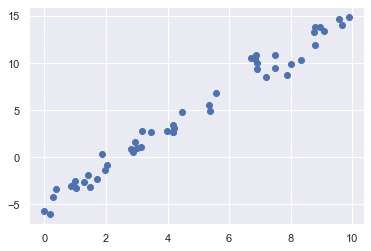

In [5]:
# Create random data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = -5 + 2 * x + rng.randn(50)
plt.scatter(x, y);

In [6]:
x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])

In [7]:
x.shape

(50,)

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

**Step 1 - Choose model hyperparameters**

Hyperparameters are model parameters that we select before fitting it to the data. These change the behaviour of our model. For a linear regression, the only hyperparameter we're interested in is whether or not to fit the intercept to our data. If we set this to `False`, then Python expects the data to be centered and simply sets $\beta_0 = 0$.

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

**Step 2 - Arrange data into a features matrix and target vector**

Scikit learn is an extremely flexible framework for machine learning. This flexibility comes at the cost of very strict requirements for features and target values.

- Features must be a 2D-array with the shape (number of samples, number of features), i.e. each row of X represents a data entry and each column represents a feature
- Target values must be a 1D-array with the shape (number of samples, )

In case we only have one feature, like here, we need to first transform the variable.

<img src="../images/numpy_array.png">

In [9]:
print("Shape of x: {}".format(x.shape))
print(x[:5])

Shape of x: (50,)
[4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00
 1.46755891e+00]


In [10]:
print("Shape of y: {}".format(y.shape))
print(y[:5])

Shape of y: (50,)
[ 2.65326739  8.56128423 -5.66895863  1.03398685 -3.18219253]


In [11]:
x = x[:,np.newaxis]
print("Shape of x: {}".format(x.shape))
print(x[:5])

Shape of x: (50, 1)
[[4.17022005e+00]
 [7.20324493e+00]
 [1.14374817e-03]
 [3.02332573e+00]
 [1.46755891e+00]]


**Step 3 - Fit the model to your data**

In [12]:
model.fit(x, y)

LinearRegression()

We can inspect the parameters $\beta_0, \beta_1$ of the model:

In [13]:
# intercept, i.e. beta_0
model.intercept_

-4.998577085553202

In [14]:
# slope, i.e. beta_1
model.coef_

array([2.02720881])

**Step 4 - Visually inspect the fit**

We can apply the model to our input features and visually inspect the fit.

In [15]:
y_hat1=model.predict([[8.5]])
y_hat1

array([12.2326978])

In [16]:
y_hat2=model.intercept_+model.coef_[0]*8.5
y_hat2

12.232697802512707

In [17]:
yfit = model.predict(x)

In [18]:
print("Shape of yfit: {}".format(yfit.shape))
print(yfit)

Shape of yfit: (50,)
[ 3.45532973  9.60390451 -4.99625847  1.13033546 -2.02352874 -3.12668096
 -1.22269367  2.00666042  3.04472811  5.92436322  3.49937104  8.892253
 -0.85390307 12.80269695 -4.44337338  8.59319935  3.46106263  6.32723234
 -2.1526407  -0.98264625 11.23418736 14.63010688  1.35518547  9.03624798
 12.76766102 13.13696802 -3.27455334 -4.20685508 -1.55575986 12.80320511
 -3.00488141  3.53815379 14.41984386  5.80979655  9.02721673  1.39758358
  8.9182302  11.92102807 -4.62783552 10.20841456 15.04770203 10.16830298
  0.68660823 11.001763   -2.90597039  4.08115994 13.420551    0.9535948
  0.83522993 -2.36262642]


In [19]:
print(y)

[ 2.65326739  8.56128423 -5.66895863  1.03398685 -3.18219253 -2.91881241
  0.3850064   2.6532587   2.74351393  4.88870572  2.63673199 10.39684461
 -0.86014725 11.92535308 -4.26133265 10.50960534  3.466255    6.79099968
 -1.89209091 -1.39022006  9.87237318 14.01588879  1.05958933  9.4330755
 13.36676646 13.82323535 -3.01352845 -3.33376317 -2.35778955 13.81571822
 -2.5201335   3.12405966 14.64630875  5.58773399  9.96917167  2.83012944
 10.91559396 10.2960171  -6.07834826  9.49842044 14.93725885 10.83948201
  0.92451479  8.76338535 -3.24168388  4.78584517 13.4020048   1.63429415
  0.53317863 -2.60018663]


The model applies the learned coefficients $\beta_0, \beta_1$ to each row of our feature matrix (a "row" here is simply a single value) and computes the output. We could do this manually as well to confirm that scikit-learn is doing what we expect it to, e.g.

In [20]:
model.intercept_ + model.coef_ * x[0]

array([3.45532973])

Let's plot the raw data and the predicted values using matplotlib

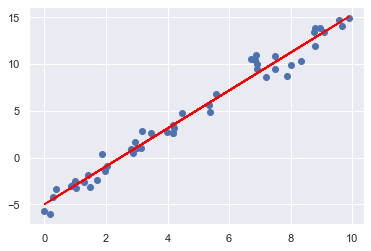

In [21]:
plt.scatter(x, y);
plt.plot(x, yfit, color='red');

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are ``coef_`` and ``intercept_``:

In [22]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [2.02720881]
Model intercept: -4.998577085553202


We see that the results are very close to the inputs, as we might hope. Can we measure how close, though?

### How well does the model fit the data?
The quality of a linear regression fit is most commonly described with the **mean squared error (MSE)**, which computes the average of the squared differences between observed and predicted target values:

$$MSE = \frac{1}{N} \cdot \sum_i^N (y_i - \hat y_i)^2$$

where:
- $y_i$ represents the observed target value for $x_i$
- $\hat y_i$ represents the predicted target value for $x_i$ as per the learned parameters.
- $N$ is equal to the number of observations

We can easily compute the mean squared error with scikit-learn;

In [23]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_true=y, y_pred=yfit)
mse

0.818338857026618

In [24]:
rmse=np.sqrt(mse)
rmse

0.9046208360559788

In [25]:
np.min(y),np.max(y)

(-6.078348258545754, 14.937258847577725)

An inherent shortcoming of this metric is that it depends on the scaling of the output variables, e.g. if our outputs and predicted variables are scaled by a factor of 2, then the MSE is scaled by a factor of 4. This doesn't mean that the model performs worse on larger target variables and better on smaller ones.

In [26]:
mean_squared_error(y_true=2*y, y_pred=2*yfit)

3.273355428106472

To solve this, we introduce the **coefficient of determination** (also referred to as $R^2$ or R-Squared). $R^2$ describes the ratio of the mean squared error of the model compared to the mean squared error of the **null model**, which is simply a horizontal line through the mean of the observed target variables ($\beta_0 = mean(y_1, ..., y_N)$ and $\beta_1 = 0$)"

$$R^2 = 1 - \frac{MSE_{model}}{MSE_{null}}$$

where:
- $MSE_{model} = \frac{1}{N} \cdot \sum_i^N (y_i - \hat y_i)^2$ (as above)
- $MSE_{null} = \frac{1}{N} \cdot \sum_i^N (y_i - \bar y)^2$
- and $\bar y = mean(y_1, ..., y_N)$ is the mean of all observed target values.

In other words, $R^2$ is one minus the the ratio of the blue area to the red area.

<img src="../images/Coefficient_of_Determination.svg" />

Another way of phrasing this is that $R^2$ is the fraction of variance in the data that can be explained by the model. It (usually) lies between 0 and 1, and higher is better because it means that more variance is explained by the model. The remaining variance in data is due to complex relationships between features and target values not considered by the model and random noise.

Note that a perfect $R^2 = 1$ should be regarded with suspicion. This means that:

- The model fully describes the relationship between features and target values
- There is no randomness in the data

both of which are extremely unlikely in any real-life scenario.

Scikit-Learn also lets us compute the $R^2$ score:

In [27]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=yfit)

0.9790800609430612

Note that this score is robust towards value scaling:

In [28]:
r2_score(y_true=2*y, y_pred=2*yfit)

0.9790800609430612

*Note: $R^2$ can be negative in some situations. In particular, if no intercept was included in the fit, $R^2$ can become negative. In these cases, the learned model is worse than the null model.*

The $R^2$ necessarily increases for any predictor that's added to the data, even pure noise. The **Adjusted $R^2$** adjusts for this, and you should use this in place of the R-squared if comparing models with different numbers of predictors.

> ${R^2}_{Adj.} = 1- \frac {(1 - R^2)(N - 1)}{N - p - 1}$

> $N$ = size of data set <br>
> $p$ = number of predictors 

In [ ]:
x.shape[1]

In [29]:
def adj_r2(ytrue, ypred, N, p):
    return 1- ((1-r2_score(ytrue, ypred))*(N - 1))/(N - p - 1)

adj_r2(y, yfit, N=len(y),p=x.shape[1])

0.978644228879375

### Exercise - Create your first Linear Regression model

Given the following X and y, train a linear regression model and show the results.

- Create and fit the model using intercept=True
- Show the trained parameters (intercept and slope)
- Show the MSE and R2 for the predicted target values $\hat{y_i}$
- Plot the original datapoints and the regression line
- Repeat the previous steps with intercept=False

The data:

In [30]:
rng = np.random.RandomState(1)
X = 100 * rng.rand(50)
y = 26 * X - 722 + rng.randn(50)*200

In [31]:
X.shape

(50,)

In [32]:
y.shape

(50,)

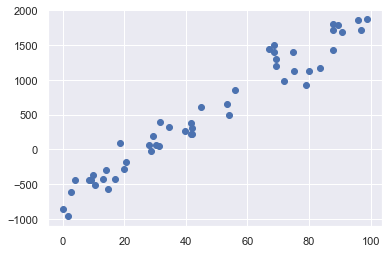

In [33]:
plt.scatter(X, y);

Create and fit the model

Hints:
- np.newaxis

In [ ]:
### Your code here

In [34]:
# MC
# Reshape X
X = X[:,np.newaxis]
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression()

Show the trained parameters (intercept and slope)

Hints: 
- Trained parameters have a trailing underscore
- Type "model." and then press TAB to have Jupyter show you all available methods and variables

In [ ]:
### Your code here

In [35]:
# MC
print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))

Intercept: -721.7154171106408
Slope:     [26.54417621]


Show the MSE and R2 for the predicted target values $\hat{y_i}$

Hints: 
- Metrics can be found in the module `sklearn.metrics`. Use TAB to view available metrics.

In [ ]:
### Your code here

In [36]:
# MC
yfit = model.predict(X)
print("Mean Squared Error: {}".format(mean_squared_error(y, yfit)))
print("R^2:                {}".format(r2_score(y, yfit)))

Mean Squared Error: 32733.554281064695
R^2:                0.9525174944395889


Plot the original datapoints and the regression line

In [ ]:
### Your code here

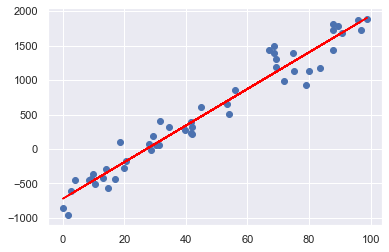

In [37]:
# MC
plt.scatter(X, y)
plt.plot(X, yfit, c='red');

Repeat the previous steps with intercept=False

In [ ]:
### Your code here

Mean Squared Error: 188688.99981533657
R^2:                0.7262922808201473


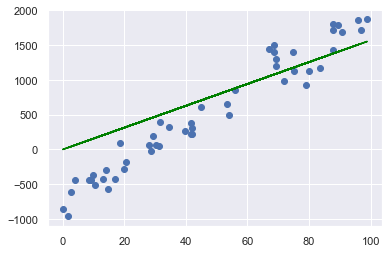

In [38]:
# MC
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
yfit = model.predict(X)
print("Mean Squared Error: {}".format(mean_squared_error(y, yfit)))
print("R^2:                {}".format(r2_score(y, yfit)))
plt.scatter(X, y)
plt.plot(X, yfit, c='green');

What does the intercept do?

In [ ]:
# MC
# When fit_intercept is set to False, the data is assumed to already be centered 
# and the model intercept will be set to 0.

# help(sklearn.linear_model.LinearRegression)

## Multidimensional linear regression
The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$

where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize. Nonetheless, the general steps for fitting a model to data outlined for the one-dimensional case above remain the same.

In [39]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
# b0 = 0.5, b1 = 1.5, b2 = -2, b3 = 1
y = 0.5 + 1.5 * X[:, 0] - 2 * X[:, 1] + 1 * X[:, 2] + rng.randn(100)

model = LinearRegression()
model.fit(X, y)

print("Intercept:    {}".format(model.intercept_))
print("Coefficients: {}".format(model.coef_))

Intercept:    0.6562333465768129
Coefficients: [ 1.48159542 -1.97622428  0.97258042]


In [40]:
yfit=model.predict(X)
mse=mean_squared_error(y,yfit)
r2=r2_score(y,yfit)
print(mse,r2)

0.9178545236998539 0.9857287859150989


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data. In this way, we can use the single `LinearRegression` estimator to fit lines, planes, or hyperplanes to our data.

### Exercise - Effects of Advertising on Sales

Imagine that your company wants to increase sales on a certain product. You cannot increase sales directly, but you can adjust advertising.

The advertising dataset in the file `data/advertising.csv` contains information on money spent on advertising via various channels as well as revenue for a product. Each row represents a separate time interval, e.g. a week's worth of sales. For the sake of simplicity we'll ignore confounding factors like seasonality.

The features are:
- TV: advertising dollars spent on TV
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

and the response is:
- Sales: sales of a single product in a given market

All numbers are in thousands of dollars, e.g. 14.4 is equivalent to \$14,400.

In [41]:
sales = pd.read_csv("../data/advertising.csv", index_col=0)
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Explore the data and use simple, one-dimensional linear regression models to find answers to the following.
- What is the relation between each ad type and the sales?
- How well do the individual simple linear regression models describe this relation? (Hint: R2 score)

In [ ]:
### Your code here

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


TV ad intercept: 7.032593549127693
TV ad slope:     0.047536640433019764
R2 for TV:       0.611875050850071


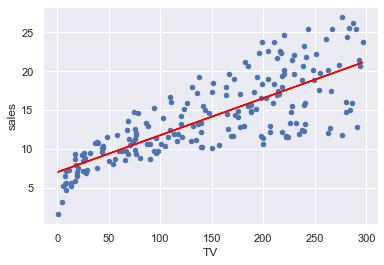

In [44]:
# MC
model_tv = LinearRegression().fit(sales[["TV"]], sales["sales"])
print("TV ad intercept: {}".format(model_tv.intercept_))
print("TV ad slope:     {}".format(model_tv.coef_[0]))
r2score_tv = r2_score(
    sales["sales"], model_tv.predict(sales[["TV"]]))
print("R2 for TV:       {}".format(r2score_tv))
sales.plot(x="TV", y="sales", kind="scatter")
plt.plot(sales[["TV"]], model_tv.predict(sales[["TV"]]), c='red');

In [46]:
np.corrcoef(sales['TV'],sales['sales'])[0,1]**2

0.6118750508500705

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Radio ad intercept: 9.311638095158283
Radio ad slope:     0.20249578339243965
R2 for Radio:       0.33203245544529525


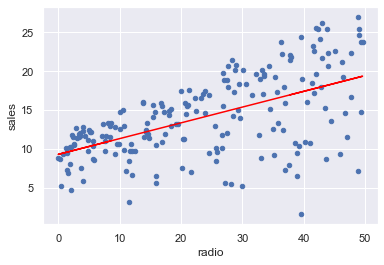

In [47]:
# MC
model_radio = LinearRegression().fit(sales[["radio"]], sales["sales"])
print("Radio ad intercept: {}".format(model_radio.intercept_))
print("Radio ad slope:     {}".format(model_radio.coef_[0]))

r2score_radio = r2_score(
    sales["sales"], model_radio.predict(sales[["radio"]]))
print("R2 for Radio:       {}".format(r2score_radio))

sales.plot(x="radio", y="sales", kind="scatter")
plt.plot(sales[["radio"]], model_radio.predict(sales[["radio"]]), c='red');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Newspaper ad intercept: 12.35140706927816
Newspaper ad slope:     0.05469309847227336
R2 for Newspaper:       0.05212044544430516


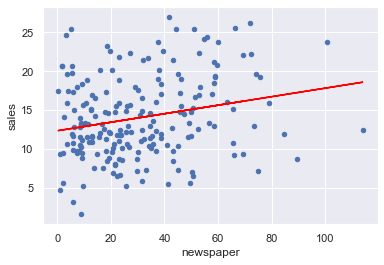

In [48]:
# MC
model_newspaper = LinearRegression().fit(sales[["newspaper"]], sales["sales"])
print("Newspaper ad intercept: {}".format(model_newspaper.intercept_))
print("Newspaper ad slope:     {}".format(model_newspaper.coef_[0]))

r2score_newspaper = r2_score(
    sales["sales"], model_newspaper.predict(sales[["newspaper"]]))
print("R2 for Newspaper:       {}".format(r2score_newspaper))

sales.plot(x="newspaper", y="sales", kind="scatter")
plt.plot(sales[["newspaper"]], model_newspaper.predict(sales[["newspaper"]]), c='red');

**Discussion questions:**

- Which ad types have the strongest and weakest influence on sales?
- For each ad type, how much is the expected sales given an additional budget of 10 thousand dollar for that ad type?

In [ ]:
# MC

# The R2 score indicates how good a fit is and therefore how strong a feature's influence is.
# A low R2 score means that the model is extremely unreliable and a large fraction of the variation
# in the target values (i.e. sales) cannot be explained by the model. That means even if we 
# increased the budget for newspaper ads, we can't be sure that would actually lead to an 
# increase in sales. A look at the plot above shows that there is no correlation between 
# sales and newspaper ad budget.

# On the other hand, the budget for TV predict sales quite accurately, i.e. the model trained only on 
# the TV ad budget explains a large fraction of the variance in the sales numbers. We can be reasonably
# certain that an increase in the TV ad budget will lead to an increase in sales.

# If the target value, sales, is expressed as
#   sales = intercept_ + coef_ * ad_budget
# then the slope (coef_) indicates how much the sales value changes when ad_budget changes.
# The increase in expected sales can be determined via
#   sales = intercept_ + coef_ * (ad_budget + 10)
#         = intercept_ + coef_ * ad_budget + 10 * coef_
# So that an increase of 10k in an advertisement's budget leads to an increase of 10 * coef_ in sales

In [49]:
# MC
print(sales["TV"].corr(sales["sales"])**2,r2score_tv )
print(sales["radio"].corr(sales["sales"])**2, r2score_radio) 
print(sales["newspaper"].corr(sales["sales"])**2, r2score_newspaper)

0.6118750508500705 0.611875050850071
0.33203245544529514 0.33203245544529525
0.05212044544430501 0.05212044544430516


Let's see if we can improve the model performance with a multiple linear regression
- Train a multiple linear regression model on all ad types simultaneously. How well does it perform?
- How do the coefficients change versus the simple linear regression?

In [ ]:
### Your code here

In [50]:
# MC
model = LinearRegression().fit(sales[["TV", "radio", "newspaper"]], 
                               sales["sales"])

r2score = r2_score(
    sales["sales"], model.predict(sales[["TV", "radio", "newspaper"]]))
print("R2 of MLR:        {}".format(r2score))
print()
print("TV ad SLR:        {}".format(model_tv.coef_[0]))
print("TV ad MLR:        {}".format(model.coef_[0]))
print()
print("Radio ad SLR:     {}".format(model_radio.coef_[0]))
print("Radio ad MLR:     {}".format(model.coef_[1]))
print()
print("Newspaper ad SLR: {}".format(model_newspaper.coef_[0]))
print("Newspaper ad MLR: {}".format(model.coef_[2]))

R2 of MLR:        0.8972106381789522

TV ad SLR:        0.047536640433019764
TV ad MLR:        0.04576464545539761

Radio ad SLR:     0.20249578339243965
Radio ad MLR:     0.18853001691820462

Newspaper ad SLR: 0.05469309847227336
Newspaper ad MLR: -0.0010374930424762972


- What are the expected sales given a new budget of TV=100, Radio=25 and Newspaper=25?

In [ ]:
### Your code here

In [51]:
# MC
model.predict(X=[[100, 25, 25]])

array([12.20266701])

In [52]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [53]:
model.intercept_

2.9388893694594067

In [54]:
print('10 units increase in TV channel, given radio and newspaper fixed, will increase the sale {:.3f}'.format(10*model.coef_[0]))

10 units increase in TV channel, given radio and newspaper fixed, will increase the sale 0.458


In [55]:
print('10 units increase in radio channel, given TV and newspaper fixed, will increase the sale {:.3f}'.format(10*model.coef_[1]))

10 units increase in radio channel, given TV and newspaper fixed, will increase the sale 1.885


## Feature Scaling

For those machine learning algorithms which are based on the distance of the data points, the range (scale) of the features matter, because it defines the magnitude of the feature and those features in larger scales (e.g. Kilometers vs. Centimeters) will dominate the features in smaller scales. Therefore, as part of the pre-processing step in designing the predictive models, one needs to re-scale the features in the similar ranges.

#### Standardisation:

$$x_{scaled} = \frac{x - \bar {x}}{s}$$

Where $\bar{x} =  mean(x)$, and $s = std(x)$.

Therefore, $mean(x_{scaled}) = 0$ , and $std(x_{scaled}) = 1$. 
In case of presence of outliers for the feature x, this method is not helpful to set the range of $x_{scaled}$. 


#### Min-Max Scaling: 

$$x_{scaled}=\frac{x-x_{min}}{x_{max} - x_{min}} $$

Therefore, $range(x) = [0 , 1]$


#### Mapping to a Gaussian distribution, PowerTransformer:

PowerTransformer aims to map data from any distribution to as close to a Gaussian (Normal) distribution as possible in order to stabilize variance and minimize skewness. In general, you'll only want to normalize your data if you're going to use a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, and Gaussian naive Bayes. 


### Feature Scaling in Python:

For each scaling methods "Standardisation" and Min-Max Scaling, we can call the relevant methods from `sklearn.preprocessing`. 


#### Standardisation in Python:

`from sklearn.preprocessing import StandardScaler`

`scaler = StandardScaler().fit(x)`

`x_scaled = scaler.transform(x)`


#### Min-Max Scaling in Python: 

`from sklearn.preprocessing import MinMaxScaler`

`scaler = MinMaxScaler().fit(x)`

`x_scaled = scaler.transform(x)`


#### Mapping to a Gaussian distribution, PowerTransformer:

`from sklearn.preprocessing import PowerTransformer`

`pt = PowerTransformer(method='box-cox', standardize=True)`

In PowerTransformer, you need to set the hyperparameter `method='box-cox'` if the data is positive. For negative data you need to set `method='yeo-johnson'`. Hyperparameter `standardize=True` applies zero-mean, unit-variance normalization to the transformed output.

`x_scaled = pt.fit_transform(x)` 

**Example:**

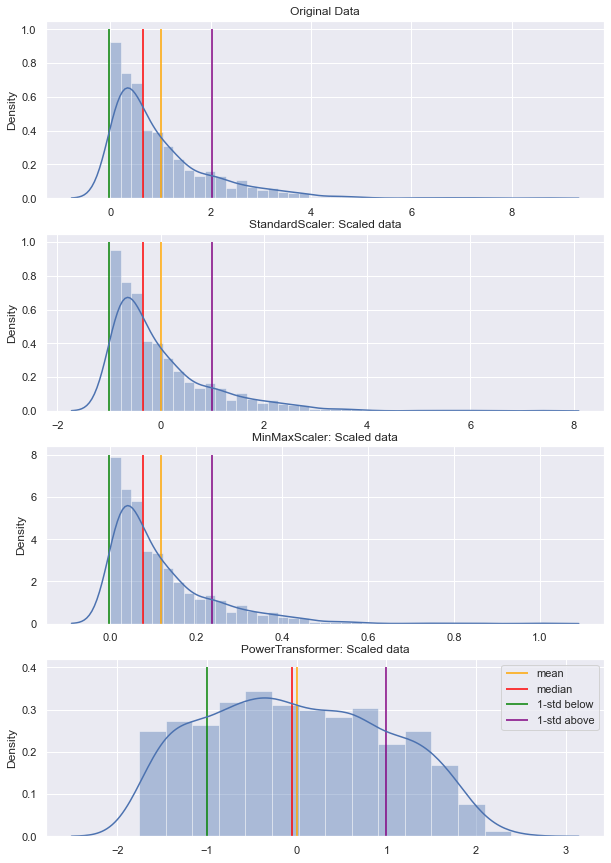

In [58]:
# set seed for reproducibility
np.random.seed(0)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer 

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)[:,np.newaxis]

# StandardScaler scale the data between 0 and 1
scaler_std = StandardScaler().fit(original_data)
scaled_std = scaler_std.transform(original_data)

# MinMaxScaler scale the data between 0 and 1
scaler_Mm = MinMaxScaler().fit(original_data)
scaled_Mm = scaler_Mm.transform(original_data)

# MinMaxScaler scale the data between 0 and 1
scaler_PT = PowerTransformer().fit(original_data)
scaled_PT = scaler_PT.transform(original_data)

# plot both together to compare
fig, ax=plt.subplots(4,1)
fig.set_size_inches(10, 15)

sns.distplot(original_data, ax=ax[0])
ax[0].vlines(np.mean(original_data), ymin = 0, ymax = 1, 
                               color = 'orange', label = 'mean')
ax[0].vlines(np.median(original_data), ymin = 0, ymax = 1, 
                            color = 'red', label = 'median')
ax[0].vlines(np.mean(original_data) - np.std(original_data, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'green', label = '1-std below')
ax[0].vlines(np.mean(original_data) + np.std(original_data, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'purple', label = '1-std above')
ax[0].set_title("Original Data")


sns.distplot(scaled_std, ax=ax[1])
ax[1].set_title("StandardScaler: Scaled data")
ax[1].vlines(np.mean(scaled_std), ymin = 0, ymax = 1, 
                               color = 'orange', label = 'mean')
ax[1].vlines(np.median(scaled_std), ymin = 0, ymax = 1, 
                            color = 'red', label = 'median')
ax[1].vlines(np.mean(scaled_std) - np.std(scaled_std, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'green', label = '1-std below')
ax[1].vlines(np.mean(scaled_std) + np.std(scaled_std, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'purple', label = '1-std above')


sns.distplot(scaled_Mm, ax=ax[2])
ax[2].set_title("MinMaxScaler: Scaled data")
ax[2].vlines(np.mean(scaled_Mm), ymin = 0, ymax = 8, 
                               color = 'orange', label = 'mean')
ax[2].vlines(np.median(scaled_Mm), ymin = 0, ymax = 8, 
                            color = 'red', label = 'median')
ax[2].vlines(np.mean(scaled_Mm) - np.std(scaled_Mm, ddof = 1), ymin = 0, ymax = 8, 
                               color = 'green', label = '1-std below')
ax[2].vlines(np.mean(scaled_Mm) + np.std(scaled_Mm, ddof = 1), ymin = 0, ymax = 8, 
                               color = 'purple', label = '1-std above')


sns.distplot(scaled_PT, ax=ax[3])
ax[3].set_title("PowerTransformer: Scaled data")
ax[3].vlines(np.mean(scaled_PT), ymin = 0, ymax = .4, 
                               color = 'orange', label = 'mean')
ax[3].vlines(np.median(scaled_PT), ymin = 0, ymax = .4, 
                            color = 'red', label = 'median')
ax[3].vlines(np.mean(scaled_PT) - np.std(scaled_PT, ddof = 1), ymin = 0, ymax = .4, 
                               color = 'green', label = '1-std below')
ax[3].vlines(np.mean(scaled_PT) + np.std(scaled_PT, ddof = 1), ymin = 0, ymax = .4, 
                               color = 'purple', label = '1-std above')

plt.legend()
plt.show()

**Example: Impact of scaling on sales dataset**

In [59]:
X = sales[["TV", "radio", "newspaper"]]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [60]:
scaler = PowerTransformer().fit(X)
scaled_X = scaler.transform(X)
scaled_X[:4,:]

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643]])

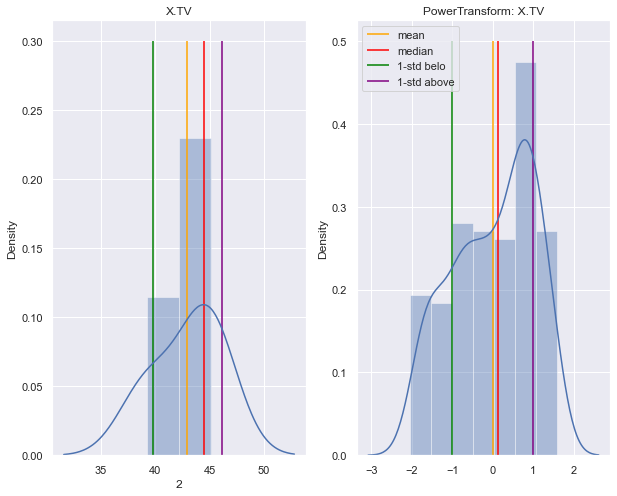

In [61]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
fig.set_size_inches(10, 8)

sns.distplot(X.iloc[1,:], ax=ax[0])
ax[0].vlines(np.mean(X.iloc[1,:]), ymin = 0, ymax = .3, 
                               color = 'orange', label = 'mean')
ax[0].vlines(np.median(X.iloc[1,:]), ymin = 0, ymax = .3, 
                            color = 'red', label = 'median')
ax[0].vlines(np.mean(X.iloc[1,:]) - np.std(X.iloc[1,:], ddof = 1), ymin = 0, ymax = .3, 
                               color = 'green', label = '1-std below')
ax[0].vlines(np.mean(X.iloc[1,:]) + np.std(X.iloc[1,:], ddof = 1), ymin = 0, ymax = .3, 
                               color = 'purple', label = '1-std above')
ax[0].set_title("X.TV")


sns.distplot(scaled_X[:,0], ax=ax[1])
ax[1].set_title("PowerTransform: X.TV")
ax[1].vlines(np.mean(scaled_X[:,0]), ymin = 0, ymax = .5, 
                               color = 'orange', label = 'mean')
ax[1].vlines(np.median(scaled_X[:,0]), ymin = 0, ymax = .5, 
                            color = 'red', label = 'median')
ax[1].vlines(np.mean(scaled_X[:,0]) - np.std(scaled_X[:,0], ddof = 1), ymin = 0, ymax = .5, 
                               color = 'green', label = '1-std belo')
ax[1].vlines(np.mean(scaled_X[:,0]) + np.std(scaled_X[:,0], ddof = 1), ymin = 0, ymax = .5, 
                               color = 'purple', label = '1-std above')

plt.legend()
plt.show()

In [62]:
model = LinearRegression().fit(X, sales["sales"])

r2score = r2_score(
    sales["sales"], model.predict(X))
print("R2 of MLR:        {}".format(r2score))
print("MSE of MLR:        {}".format(mean_squared_error(sales["sales"], model.predict(X))))


print()
print("TV ad MLR:        {}".format(model.coef_[0]))
print()
print("Radio ad MLR:     {}".format(model.coef_[1]))
print()
print("Newspaper ad MLR: {}".format(model.coef_[2]))

R2 of MLR:        0.8972106381789522
MSE of MLR:        2.784126314510936

TV ad MLR:        0.04576464545539761

Radio ad MLR:     0.18853001691820462

Newspaper ad MLR: -0.0010374930424762972


In [63]:
x_new=[[100,25,25]]
model.predict(x_new)

array([12.20266701])

In [64]:
model_scaled = LinearRegression().fit(scaled_X, sales["sales"])

r2score = r2_score(
    sales["sales"], model_scaled.predict(scaled_X))
print("R2 of MLR:        {}".format(r2score))
print("MSE of MLR:        {}".format(mean_squared_error(sales["sales"], model_scaled.predict(scaled_X))))


print()
print("TV ad MLR:        {}".format(model_scaled.coef_[0]))
print()
print("Radio ad MLR:     {}".format(model_scaled.coef_[1]))
print()
print("Newspaper ad MLR: {}".format(model_scaled.coef_[2]))

R2 of MLR:        0.9074639862122942
MSE of MLR:        2.5064067571002666

TV ad MLR:        3.9707553863143206

Radio ad MLR:     2.764248080722213

Newspaper ad MLR: 0.0643293016332074


In [65]:
model_scaled.predict(scaler.transform(x_new))

array([12.90348166])

## Handling Highly Correlated Features

Highly correlated features (also known as multicollinearity) can lead to decreased generalization performance on the test set due to high variance and less model interpretability.

There are several ways to deal with multicollinearity problems in a model:

- Remove highly correlated predictors from the model
- Principal Components Analysis (PCA)
- Use regression models that cut the number of predictors to a smaller set of uncorrelated components (e.g Ridge Regression)

In [66]:
size = 100

#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, intercept, names = None, sort = False):
    if names == None:
        names = ["x%s" % x for x in range(1,len(coefs)+1)]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    st = " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
    return " + ".join([str(round(intercept, 3)), st])

#We run the method 10 times with different random seeds
for i in range(10):
    print ("Random seed %s" % i)
    print()
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = 2*X1+ np.random.normal(0, .1, size)
    X3 = X_seed + np.random.normal(0, .1, size)
    Y = X1 + X2 + X3 + np.random.normal(0, 1, size)
    X = np.array([X1, X2, X3]).T
 
    lr = LinearRegression()
    lr.fit(X,Y)
    print ("Linear model:", pretty_print_linear(lr.coef_, lr.intercept_))

Random seed 0

Linear model: -0.012 + -0.974 * x1 + 2.14 * x2 + 0.642 * x3
Random seed 1

Linear model: 0.051 + 1.902 * x1 + 1.084 * x2 + -0.167 * x3
Random seed 2

Linear model: -0.189 + 4.026 * x1 + -0.811 * x2 + 1.687 * x3
Random seed 3

Linear model: 0.075 + 0.491 * x1 + 0.988 * x2 + 1.567 * x3
Random seed 4

Linear model: 0.039 + 0.908 * x1 + 0.572 * x2 + 2.099 * x3
Random seed 5

Linear model: -0.061 + -2.261 * x1 + 1.636 * x2 + 3.028 * x3
Random seed 6

Linear model: -0.075 + 3.826 * x1 + -0.576 * x2 + 1.414 * x3
Random seed 7

Linear model: -0.13 + 0.937 * x1 + 1.476 * x2 + 0.185 * x3
Random seed 8

Linear model: 0.041 + -3.579 * x1 + 3.058 * x2 + 1.544 * x3
Random seed 9

Linear model: 0.045 + 0.402 * x1 + 1.108 * x2 + 1.245 * x3


## Handling Categorical Predictors

So far, all of our predictors have been numeric. What if one of our predictors was categorical?

Categorical predictors cannot be used in the regression equation just as they are. We need to transform them into dummy variables. 

### Dummy variables

We need to represent all data numerically. If a predictor only has two categories, we can simply create a dummy variable that represents the categories as a binary value:

<img src='../images/Dummy1.png'>

<img src='../images/Dummy2.png'>

To create columns of dummy variables in our data frame, we can use `pd.get_dummies()`. Adding the `drop_first = True` argument adds $k-1$ columns to the DataFrame for a variable with $k$ categories. 

### Example
For `insurance` data set, create a linear regression model to predict `charges` based on the rest of the given variabled. 

In [67]:
insurance = pd.read_csv('../data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [70]:
insurance.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


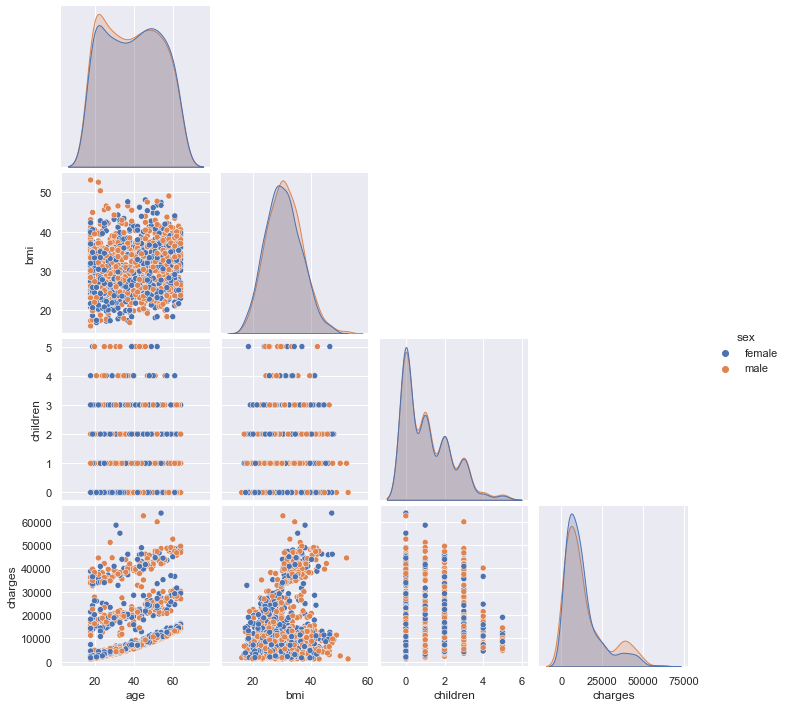

In [71]:
sns.pairplot(insurance, hue='sex', corner=True, diag_kind="auto");

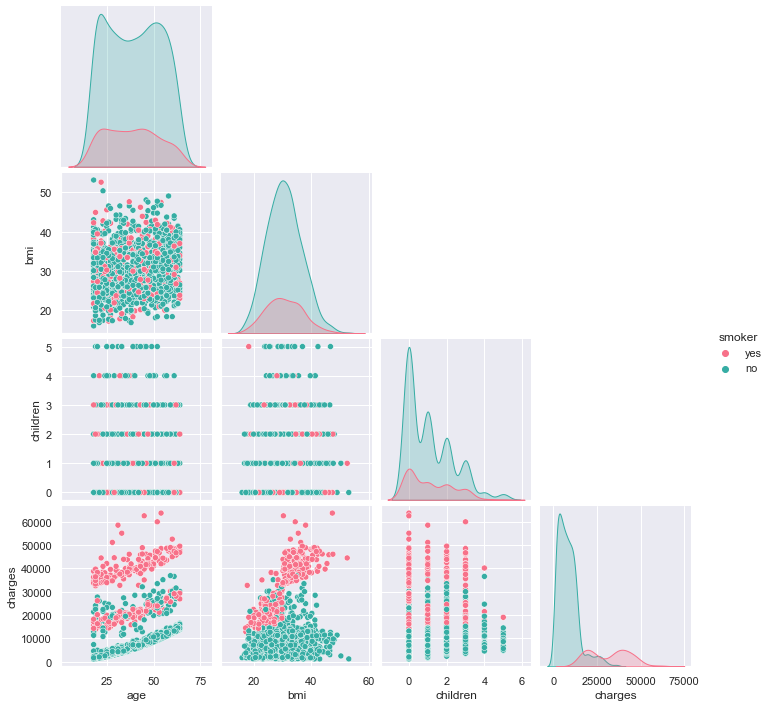

In [72]:
sns.pairplot(insurance, hue='smoker', palette="husl", corner=True);

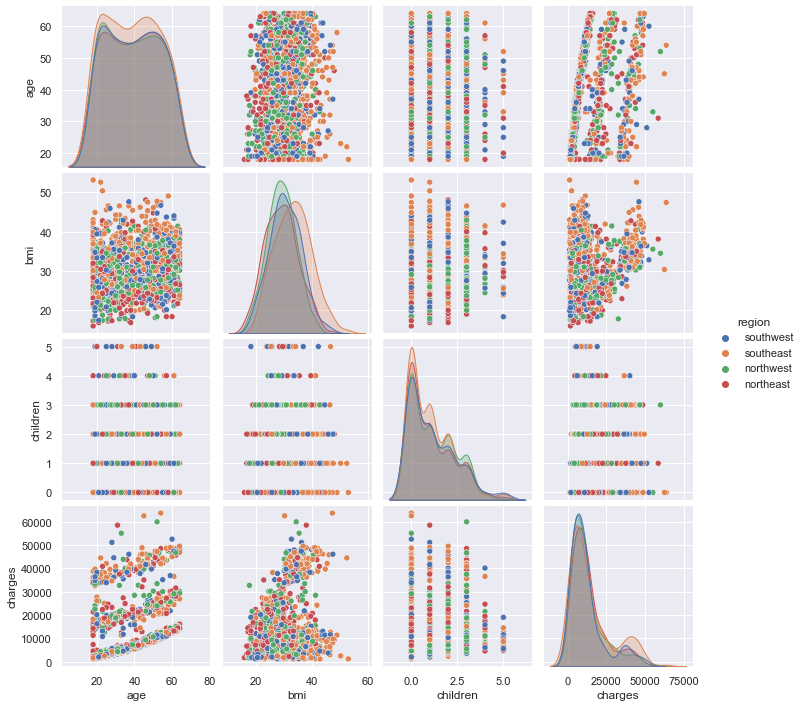

In [73]:
sns.pairplot(insurance, hue='region', palette="deep");

In [74]:
X=insurance.drop('charges', axis=1)
y=insurance.charges
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [75]:
X_dum=pd.get_dummies(X, drop_first=True)
X_dum

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [76]:
lm = LinearRegression().fit(X_dum,y)

r2score = r2_score(y, lm.predict(X_dum))
print("R2 = {:.2f}".format(r2score))

R2 = 0.75


In [78]:
lm.coef_

array([  256.85635254,   339.19345361,   475.50054515,  -131.3143594 ,
       23848.53454191,  -352.96389942, -1035.02204939,  -960.0509913 ])

In [79]:
print('y=({:.2f})+({:.2f}*age)+({:.2f}*bmi)+({:.2f}*children)+({:.2f}*sex_male)+({:.2f}*smoker_yes)+({:.2f}*region_northwest)+({:.2f}*region_southeast)+({:.2f}*region_southwest)'.\
      format(lm.intercept_,lm.coef_[0], lm.coef_[1],  lm.coef_[2],  lm.coef_[3],lm.coef_[4],lm.coef_[5],lm.coef_[6],lm.coef_[7] ))

y=(-11938.54)+(256.86*age)+(339.19*bmi)+(475.50*children)+(-131.31*sex_male)+(23848.53*smoker_yes)+(-352.96*region_northwest)+(-1035.02*region_southeast)+(-960.05*region_southwest)


How do we interpret the **smoker_yes coefficient**? For a given age, bmi, number of children, sex, and region; the amount of insurance charge for smokers is `23848.53` higher than a non smoker.

### Exercise:

How do we interpret the **sex_male coefficient**?

## Using Linear Regression for non-linear relations

Consider the following case.

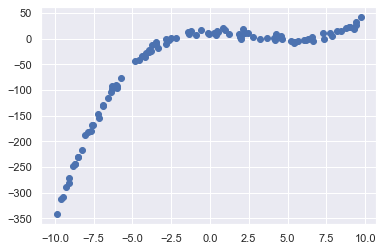

In [80]:
np.random.seed(42)

X = (10 * (2 * np.random.rand(100) - 1))[:, np.newaxis]
# b0 = 15, b1 = 0, b2 = -1.7, b3 = 0.2
y = 15 - 1.7 * X**2 + 0.2 * X**3 + np.random.normal(scale=5, size=X.shape)

plt.scatter(X, y, label = 'DataPoints')

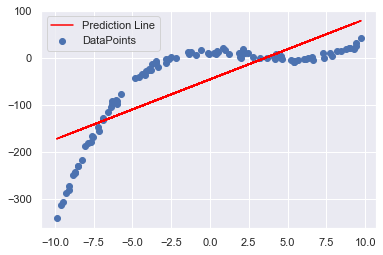

In [81]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label = 'DataPoints')
plt.plot(X, y_pred, c = 'red', label = 'Prediction Line')
plt.legend();

No matter how hard we try, we'll never be able to fit a line to capture the non-linear relationship between the features and the target value.

### Basis functions

A trick to adapt linear regression to nonlinear relationships between features and targets is to transform the data and generate new features from the existing ones using basis functions. A very common set of basis functions are **polynomial basis functions** $f_n(x) = x^n$, which transform a simple linear regression from

$$ y = \beta_0 + \beta_1 x $$

into

$$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \ldots + \beta_n x^n$$

We are free to choose how many polynomials to include. In fact, the basis functions $f(x)$ can be practically anything; we are free to transform features however we deem necessary.

This can, of course, also be extended to multiple linear regression so that, e.g.

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

could become

$$ y = \beta_0 + \beta_{1a} x_1 + \beta_{1b} x_1^2 + \beta_{2a} x_2 + \beta_{2b} x_2^2$$
 
Note that this is still a linear model. Linearity in the context of modelling means that the coefficients $\beta_i$ are only ever added to (or subtracted from) each other. The basis functions $f(x)$ may very well be non-linear, though. For example,

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 $$

is a linear model, despite the $x_1 x_2$ term, whereas

$$ y = \beta_0 + \frac{\beta_1 x}{\beta_2 + x}$$

is a non-linear model, despite only having one feature, because the coefficients are divided by each other.

**All we are doing is engineering new features to capture nonlinear patterns!**

### Regression with polynomial basis functions

The polynomial basis functions are so common and useful that this transformation is built into Scikit-Learn.

In [82]:
x_1d = np.array([2, 3, 4])[:, np.newaxis]
x_1d

array([[2],
       [3],
       [4]])

In [84]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
poly = PolynomialFeatures(degree=4, include_bias=False)
poly.fit(x_1d)
x_poly = poly.transform(x_1d)
x_poly

array([[  2.,   4.,   8.,  16.],
       [  3.,   9.,  27.,  81.],
       [  4.,  16.,  64., 256.]])

We see here that the transformer has added columns to our array corresponding to $x^n$.

`include_bias` adds an $x^0 = 1$ column as well. This can be useful for more advanced models but in the case of a linear regression, this has the same effect as adding an intercept term during the fit itself.

In [88]:
poly = PolynomialFeatures(degree=4, include_bias=True)
poly.fit(x_1d)
x_poly = poly.transform(x_1d)
x_poly

array([[  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.]])

The `fit()` and `transform()` syntax may seem cumbersome but plays into Scikit-Learn's strength as a flexible framework. All of the preprocessors/transformers that are part of the [Pipeline API](https://scikit-learn.org/stable/modules/compose.html#pipeline) as well as the actual machine learning models implement these two functions. That means we can use [pipelines](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to chain together many different steps into a single object. This ensures that our code stays concise and becomes reusable. A pipeline will apply the `fit()` and `transform()` functions of each individual step and pass along the resulting data to the next step.

For example, we can construct a pipeline that applies a polynomial transformation to the $3^{rd}$ degree, scales the resulting features to lie between 0 and 1, and then trains a linear regression on the resulting features.

In [89]:
from sklearn.pipeline import make_pipeline

In [101]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), 
    MinMaxScaler(), 
    LinearRegression())
poly_pipeline

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [102]:
poly_pipeline.steps

[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=False)),
 ('minmaxscaler', MinMaxScaler()),
 ('linearregression', LinearRegression())]

We can use the pipeline as a single object to fit the non-linear relationship from above.

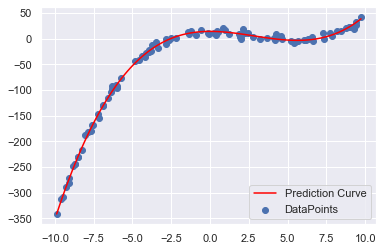

In [103]:
poly_pipeline.fit(X, y)
X_pred = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_pred = poly_pipeline.predict(X_pred)
plt.scatter(X, y, label = 'DataPoints')
plt.plot(X_pred, y_pred, c = 'red', label = 'Prediction Curve')
plt.legend();

In [104]:
r2_score(y,poly_pipeline.predict(X) )

0.9979165490625074

Our polynomial expansion accurately captures the non-linear relationship!

### A comment on `PolynomialFeatures`
The `PolynomialFeatures` preprocessor doesn't just apply exponents to features but also looks at interaction terms $x_i^n x_j^m$. For example, applying `PolynomialFeatures(degree=2)` to the following linear model:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

will result in:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2$$

`PolynomialFeatures` will generate all interaction terms where the sum of the exponents is less than or equal to `degree`. So applying `PolynomialFeatures(degree=3)` to the linear model above results in:

$$ 
\begin{aligned}
y = \beta_0 &+ \beta_1 x_1 + \beta_2 x_2\\
            &+ \beta_3 x_1^2 + \beta_4 x_2^2\\
            &+ \beta_5 x_1 x_2\\
            &+ \beta_6 x_1^3 + \beta_7 x_2^3\\
            &+ \beta_7 x_1^2 x_2 + \beta_8 x_2^2 x_1\\
\end{aligned}
$$

Keep this in mind when generating polynomial expansions: the number of resulting features can become computationally problematic if `degree` is too large. For example, if we start with 10 features, a polynomial expansion with `degree=4` will result in 1000 features:

In [105]:
np.random.seed(42)

x_1d = np.random.randint(low=-5, high=5, size=(5, 10))
x_1d

array([[ 1, -2,  2, -1,  1,  4, -3,  1,  2, -1],
       [-2,  2,  2, -3,  0, -1, -4,  2,  0, -4],
       [-1, -5,  4,  0,  3, -5,  4, -3,  1, -2],
       [ 3, -3, -1, -3,  1, -1,  3,  1, -4, -2],
       [ 3, -4,  4,  3,  4, -1, -4, -2,  1,  2]])

In [106]:
x_poly = PolynomialFeatures(degree=4).fit_transform(x_1d)
print("Original shape:    {}".format(x_1d.shape))
print("Transformed shape: {}".format(x_poly.shape))

Original shape:    (5, 10)
Transformed shape: (5, 1001)


In [107]:
# set interaction_only = True only creates x_i * x_j for i != j
x_poly_inter = PolynomialFeatures(degree=4, interaction_only = True).fit_transform(x_1d)
print("Interaction Only Transformed shape: {}".format(x_poly_inter.shape))

Interaction Only Transformed shape: (5, 386)


## Best Practice for Machine Learning
In the previous examples and exercises, we have assessed the performance of the trained model on the data it was trained on. This is problematic, as we have no guarantee that the model will capture the true relationship between the features and target values. Consider the following example:

<center><img src="../images/overfitting.png" /></center>

The black dots represent the raw input data and the two lines represent two models trained on this data.

- The blue line perfectly predicts the target value for each data point. This model has a perfect performance, i.e. $R^2 = 1$, when assessed on the training data. However, it clearly does not capture the true relationship between the feature and the target value.
- The black line, although not a perfect fit, i.e. $R^2 < 1$, much more accurately describes the true relationship between feature and target.

To avoid this phenomenon, called **overfitting**, we can split our data into a training and a test data set. This allows us to train the model on one part of the data and then assess its performance on data it has never seen to determine how well it generalizes to new data.

We can use the `sklearn.model_selection.train_test_split` function to divide the data into 2 sets for us. 

In [110]:
from sklearn.model_selection import train_test_split

# Generate random data
rng = np.random.RandomState(42)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + rng.randn(100)

In [111]:
np.dot([1,2,1], [1,-1,0])==(1*1+2*(-1)+1*0)

True

In [112]:
print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (100, 3)
y.shape (100,)


Now we divide the data into train and test.

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=42)

In [114]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (75, 3)
y_train.shape (75,)
X_test.shape (25, 3)
y_test.shape (25,)


We now have a dataset of 75 entries that we can train the model on and a test dataset of 25 entries that we can use to assess the performance of the model.

In [115]:
model = LinearRegression().fit(X_train, y_train)
print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))

Intercept: 0.4276943233972026
Slope:     [ 1.51734232 -2.00613066  1.06246986]


In [116]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train R2 Score: {}".format(r2_train))
print("Test R2 Score:  {}".format(r2_test))

Train R2 Score: 0.9889286064653651
Test R2 Score:  0.9693403884752085


The performance on the training data will typically be better than the test score. In general, we want to make sure that training and test performance are similar and maximal. We will go into more detail about tuning models, overfitting, and assessing their performance at a later point in this course. For now, keep in mind that we should separate our data into a training and a test set.

There is no ironclad rule about how large these two subsets of our data should be. In general, more training data will result in a model that better captures the true relationship between features and target.

### Exercise - Train and test the advertising dataset

Train a multiple linear regression on the advertising dataset as above, but this time reserve a fraction of the data as a test set to assess the performance. Do this with the following splits:
- Training: 50%, Test: 50%
- Training 95%, Test: 5%
- Training 5%, Test: 95%

Hint: The `test_size` argument of `train_test_split` takes a number between 0 and 1 indicating the relative size of the test set, e.g. 0.3 corresponds to "Reserve 30% of the data as a test set"

In [117]:
### Your code here

X = sales[["TV", "radio", "newspaper"]]
y = sales["sales"]

In [118]:
# MC


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = LinearRegression().fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print("=== Test Size 50% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================")    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
model = LinearRegression().fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print("=== Test Size 5% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================") 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=42)
model = LinearRegression().fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print("=== Test Size 95% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================") 

=== Test Size 50% ===
   R2 Train: 0.904
   R2 Test:  0.872
=== Test Size 5% ===
   R2 Train: 0.894
   R2 Test:  0.922
=== Test Size 95% ===
   R2 Train: 0.936
   R2 Test:  0.844


We can use the following rules of thumb regarding the train and test performances:
- If $R^2_{train} \approx R^2_{test}$ and the performance is good, then our model is optimally trained.
- If $R^2_{train} \approx R^2_{test}$ but the performance is poor
    - We need more training data or
    - The algorithm doesn't accurately capture the relationship between features and target value, e.g. trying to perform a linear regression on non-linear data.
- If $R^2_{train} \gg R^2_{test}$ then the model is most likely overfitting on the data. We will talk about solutions to this problem soon.
- If $R^2_{train} \ll R^2_{test}$ then we most likely do not have sufficient test data to correctly assess the performance. More robust performance assessments, like **cross-validation** will solve this problem for us.

## Explore sklearns datasets

Sklearn provides both toy as well as real-world datasets: https://scikit-learn.org/stable/datasets/index.html.

We can load these with the built-in `sklearn.datasets.load_*()` or `sklearn.datasets.fetch_*()` functions. Python will download these datasets if they are not already saved locally.

In [119]:
diabetes = sklearn.datasets.load_diabetes()

In [120]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

The resulting object is a dictionary with various entries, such as the data description, the features, feature names, etc.

In [121]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [122]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [123]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [124]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

**Exercise - Boston Housing Data**

We're going to predict housing prices

1. Load the sklearn dataset of the Boston house prices. 
2. Use a multiple linear regression to predict housing prices
    - Divide the data into a training and test data set (70% training/30% test split)
    - Train a multiple linear regression model
    - Assess the performance of the model using the $R^2$ score
    - Play around with the train/test split size to see how the fit changes

In [ ]:
### Your code here

In [125]:
boston = sklearn.datasets.load_boston()
print("Keys in Boston dataset: {}".format(boston.keys()))
print(boston.DESCR)

Keys in Boston dataset: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radia

In [126]:
### Your code here
X = boston.data
y = boston.target

In [131]:
# MC
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 42,
                                                    test_size=0.3)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (354, 13)
X_test shape: (152, 13)
y_train shape: (354,)
y_test shape: (152,)


In [132]:
# MC
LR_boston = LinearRegression().fit(X_train, y_train)
print("R2 train score: {}".format(LR_boston.score(X_train, y_train)))
print("R2 test score: {}".format(LR_boston.score(X_test, y_test)))

R2 train score: 0.7434997532004697
R2 test score: 0.711226005748496


3. Try to improve the regression by using polynomial features
    - Create an sklearn pipeline that generates polynomial features and then trains a multiple linear regression on these features
    - Assess the performance ($R^2$ score) of this polynomial regression on the training and test data
    - Do this for polynomial degrees 2, 3, and 4.
    - Compare your results with the multiple linear regression above. What are your observations?

In [ ]:
### Your code here

In [135]:
# MC
Poly2_LR_boston = make_pipeline(
    PolynomialFeatures(degree=2), MinMaxScaler(),
    LinearRegression())
Poly2_LR_boston.fit(X_train, y_train)
print("R2 train score (degree=2): {}".
      format(Poly2_LR_boston.score(X_train, y_train)))
print("R2 test score (degree=2): {}".
      format(Poly2_LR_boston.score(X_test, y_test)))

R2 train score (degree=2): 0.9469794920108197
R2 test score (degree=2): 0.6610321968877352


In [137]:
# MC
Poly2_LR_boston = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=True), MinMaxScaler(),
    LinearRegression())
Poly2_LR_boston.fit(X_train, y_train)
print("R2 train score (degree=2): {}".
      format(Poly2_LR_boston.score(X_train, y_train)))
print("R2 test score (degree=2): {}".
      format(Poly2_LR_boston.score(X_test, y_test)))

R2 train score (degree=2): 0.9362183440264864
R2 test score (degree=2): 0.7809740006109958


In [136]:
# MC
Poly3_LR_boston = make_pipeline(
    PolynomialFeatures(degree=3), MinMaxScaler(),
    LinearRegression())
Poly3_LR_boston.fit(X_train, y_train)
print("R2 train score (degree=3): {}".
      format(Poly3_LR_boston.score(X_train, y_train)))
print("R2 test score (degree=3): {}".
      format(Poly3_LR_boston.score(X_test, y_test)))

R2 train score (degree=3): 1.0
R2 test score (degree=3): -27.578594261536097


In [138]:
# MC
# Polynomial transformations overfit due to the comparably small amount of data
poly = PolynomialFeatures(degree=2).fit_transform(X_train)
print("Feature shape (degree=2): {}".format(poly.shape))
poly = PolynomialFeatures(degree=3).fit_transform(X_train)
print("Feature shape (degree=3): {}".format(poly.shape))

Feature shape (degree=2): (354, 105)
Feature shape (degree=3): (354, 560)


# Lasso, Ridge, and Elastic Net Regression: Regularization

Welcome to Regularization!

With the higher degree polynomials we have seen a situation were there are a lot of features and the model tends to overfit. 

Regularization is putting a penalty on the size of the coefficients to prevent overfitting.

In this Notebook we will go into Ridge and Lasso Regression, how they prevent overfitting and how they can deal with a large number of features.

## Lasso, Ridge, and Elastic Net

**Overview**
Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features. Here ‘large’ can typically mean either of two things:

- Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting)
- Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features

Though Ridge and Lasso might appear to work towards a common goal, the inherent properties and practical use cases differ substantially. Generally, they work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. Regularization reduces the model complexity and prevents over-fitting. The key difference is in how they assign penalty to the coefficients:

**Regression:**

$$\hat{y} = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_n  x_n $$

- Minimize Error: $$\sum_{i=1}^{m} {(y - \hat{y})^2} = \sum_{i=1}^{m} {(y -  \beta_0 - \beta_1  x_1 - \beta_2  x_2 - ... - \beta_n  x_n )^2}$$

**Lasso Regression:**

**LASSO** stands for ``Least Absolute Shrinkage and Selection Operator`` where emphasis on the 2 key words – ‘absolute‘ and ‘selection‘.

Lasso regression performs **L1 regularization**, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. 

- Minimize Error: $$\sum_{i=1}^{m} {(y - \hat{y})^2} + \alpha\sum_{i=1}^{n} {|\beta_i|} = \sum_{i=1}^{m} {(y -  \beta_0 - \beta_1  x_1 - \beta_2  x_2 - ... - \beta_n  x_n )^2} + \alpha\sum_{i=1}^{n} {|\beta_i|}$$

Thus, lasso regression optimizes the following:

**Objective = RSS + α * (sum of absolute value of coefficients)**

Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

1. α = 0: Same coefficients as simple linear regression
2. α = ∞: All coefficients zero (same logic as before)
3. 0 < α < ∞: coefficients between 0 and that of simple linear regression

**Ridge Regression:**


As mentioned before, ``ridge regression`` performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective.

- Minimize Error: $$\sum_{i=1}^{m} {(y - \hat{y})^2}+ \alpha \sum_{i=1}^{n} {\beta_i^2} = \sum_{i=1}^{m} {(y -  \beta_0 - \beta_1  x_1 - \beta_2  x_2 - ... - \beta_n  x_n )^2} + \alpha \sum_{i=1}^{n} {\beta_i^2}$$

Thus, ridge regression optimizes the following:

**Objective = RSS + α * (sum of square of coefficients)**

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

1. α = 0:
    - The objective becomes same as simple linear regression.
    - We’ll get the same coefficients as simple linear regression.
2. α = ∞:
    - The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
3. 0 < α < ∞:
    - The magnitude of α will decide the weightage given to different parts of objective.
    - The coefficients will be somewhere between 0 and ones for simple linear regression.

**Elastic Net Regression:**

- Minimize Error: $$\sum_{i=1}^{m} {(y - \hat{y})^2}+ \lambda_1 \sum_{i=1}^{n} {|\beta_i|} + \lambda_2 \sum_{i=1}^{n} {\beta_i^2} = \sum_{i=1}^{m} {(y -  \beta_0 - \beta_1  x_1 - \beta_2  x_2 - ... - \beta_n  x_n )^2} + \lambda_1 \sum_{i=1}^{n} {|\beta_i|} + \lambda_2 \sum_{i=1}^{n} {\beta_i^2}$$

In `sklearn`, the relationship between $\lambda_1$ and $\lambda_2$ is defined by two parameters in `ElasticNet` function `alpha` and `l1_ratio` where:
$$\alpha = \lambda_1 + \lambda_2$$
and $$ l1-ratio = \frac {\lambda_1}{(\lambda_1 + \lambda_2)}$$

For example, if $\alpha = 1$, and l1_ratio = 0.3, then:
$$ {\lambda_1 + \lambda_2 = 1} \\ { \frac {\lambda_1}{(\lambda_1 + \lambda_2)} = 0.3}$$
Therefore: 
$$ {\lambda_1 = 0.3} \\  {\lambda_2 = 0.7}$$

In [141]:
# x1=x2
# y=0.5+x1+x2 ------> [0.5, 1, 1] 

print(0.5**2+1+1)

#y=0.5 + 2*x1 ------> [0.5, 2, 0]
print(0.5**2+2**2)

#y=0.5 + 2*x2 ------> [0.5, 0, 2]
print(0.5**2+2**2)


2.25
4.25
4.25


 **Example - Lasso on Boston with Polynomials**

- Load again the boston dataset from sklearn.
- Divide the data into 30% test and 70% train set.
- Fit a Polynomial Lasso Regression on the train data
    - Use degree=2, alpha=0.1, max_iter=100000
- What is the R2 for train and test? How many features were selected?
- Now try:
    - change PolynomialLasso to set interaction_only=True in PolynomialFeatures
    - degree=3, alpha=1, max_iter=100000

In [142]:
from sklearn.linear_model import Lasso

def PolynomialLasso(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         Lasso(**kwargs))

In [143]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

In [144]:
X.shape

(506, 13)

In [145]:
y.shape

(506,)

In [147]:
X1, X2, y1, y2 = train_test_split(X, y,random_state=42,test_size=0.3)

In [148]:
Lasso_Poly2_boston = PolynomialLasso(2, alpha = 0.1, max_iter=1e5)
Lasso_Poly2_boston.fit(X1, y1)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.1, max_iter=100000.0))])

In [149]:
print("Train score", Lasso_Poly2_boston.score(X1, y1))
print("Test score", Lasso_Poly2_boston.score(X2,y2))

Train score 0.9255137864439502
Test score 0.8091379250457498


In [156]:
Lasso_Poly2_boston.steps[1][1].coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.27469940e-01,
       -0.00000000e+00,  0.00000000e+00,  4.50994646e-02, -0.00000000e+00,
        1.98955962e-01, -0.00000000e+00,  7.25842386e-04,  0.00000000e+00,
        5.69097719e-03,  2.28126345e+00, -0.00000000e+00,  1.34157842e-01,
       -1.61187363e-03,  0.00000000e+00, -1.11523099e-02, -1.37660929e-03,
        0.00000000e+00, -2.69156161e-04,  1.52944331e-02,  5.25251688e-04,
        5.28866834e-03, -3.06094795e-02,  0.00000000e+00,  1.46689118e-02,
        7.12662500e-04, -1.25522166e-02, -1.43111426e-02,  5.17033007e-04,
        6.12374375e-03, -6.86548641e-04, -7.71022853e-03,  2.42281509e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  5.81169417e-03,
        1.34523381e-03,  1.34296426e-02,  1.13820991e-03, -4.82931459e-02,
       -4.49226930e-04, -2.81240506e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [157]:
k = Lasso_Poly2_boston.steps[1][1].coef_
print("Features all", len(k))
print("Features used", sum(k != 0))
print("Features NOT used", sum(k == 0))

Features all 105
Features used 71
Features NOT used 34


In [160]:
Lasso_Poly3_boston = PolynomialLasso(3, alpha = 1, max_iter=1e5)
Lasso_Poly3_boston.fit(X1, y1)

print("Train score", Lasso_Poly3_boston.score(X1, y1))
print("Test score", Lasso_Poly3_boston.score(X2,y2))
k = Lasso_Poly3_boston.steps[1][1].coef_
print("Features all", len(k))
print("Features used", sum(k != 0))
print("Features NOT used", sum(k == 0))

Train score 0.9778399153112186
Test score -2.361079013664337
Features all 560
Features used 251
Features NOT used 309


In [161]:
def PolynomialLasso_inter(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree, 
                                            interaction_only=True),
                         Lasso(**kwargs))

In [162]:
Lasso_Poly3_inter_boston = PolynomialLasso_inter(3, 
                                                 alpha = 1, 
                                                 max_iter=1e5)
Lasso_Poly3_inter_boston.fit(X1, y1)

print("Train score", Lasso_Poly3_inter_boston.score(X1, y1))
print("Test score", Lasso_Poly3_inter_boston.score(X2,y2))
k = Lasso_Poly3_inter_boston.steps[1][1].coef_
print("Features all", len(k))
print("Features used", sum(k != 0))
print("Features NOT used", sum(k == 0))

Train score 0.9621707607397174
Test score 0.8328553100204424
Features all 378
Features used 169
Features NOT used 209


**Exercise: Ridge & ElasticNet on Boston with Polynomials**
- Fit a Polynomial Ridge Regression on the train data
    - Use degree=2, alpha=0.1, max_iter=100000
- What is the R2 for train and test? How many features were selected?
- Now try:
    - change PolynomialRidge to set interaction_only=True in PolynomialFeatures
    - degree=3, alpha=1, max_iter=100000
    
- Fit a Polynomial Elastic Net Regression on the train data
    - Use degree=2, alpha=0.1, max_iter=100000
- What is the R2 for train and test? How many features were selected?
- Now try:
    - change PolynomialElastic to set interaction_only=True in PolynomialFeatures
    - degree=3, alpha = 1, l1_ratio=0.5, max_iter=100000

In [163]:
from sklearn.linear_model import Ridge

def PolynomialRidge(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         Ridge(**kwargs))

In [164]:
# MC
Ridge_Poly2_boston = PolynomialRidge(2, alpha = 0.1, max_iter=1e5)
Ridge_Poly2_boston.fit(X1, y1)
print("Train score", Ridge_Poly2_boston.score(X1, y1))
print("Test score", Ridge_Poly2_boston.score(X2,y2))
k = Ridge_Poly2_boston.steps[1][1].coef_
print("Features all", len(k))
print("Features used", sum(Ridge_Poly2_boston.steps[1][1].coef_ != 0))
print("Features NOT used", sum(Ridge_Poly2_boston.steps[1][1].coef_ == 0))

Train score 0.9441764492001782
Test score 0.6162851060240131
Features all 105
Features used 104
Features NOT used 1


In [165]:
# MC
Ridge_Poly3_boston = PolynomialRidge(3, alpha = 1, max_iter=1e5)
Ridge_Poly3_boston.fit(X1, y1)

print("Train score", Ridge_Poly3_boston.score(X1, y1))
print("Test score", Ridge_Poly3_boston.score(X2,y2))
k = Ridge_Poly3_boston.steps[1][1].coef_
print("Features all", len(k))
print("Features used", sum(Ridge_Poly3_boston.steps[1][1].coef_ != 0))
print("Features NOT used", sum(Ridge_Poly3_boston.steps[1][1].coef_ == 0))

Train score 0.9885560941015601
Test score -20.378010090768328
Features all 560
Features used 559
Features NOT used 1


In [166]:
# MC 
from sklearn.linear_model import ElasticNet

def PolynomialElastic(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         ElasticNet(**kwargs))

In [167]:
# MC

Elastic_Poly2_boston = PolynomialElastic(2, alpha = 1, l1_ratio=0.5, 
                                         max_iter=1e5)
Elastic_Poly2_boston.fit(X1, y1)
print("Train score", Elastic_Poly2_boston.score(X1, y1))
print("Test score", Elastic_Poly2_boston.score(X2,y2))
k = Elastic_Poly2_boston.steps[1][1].coef_
print("Features all", len(k))
print("Features used", sum(Elastic_Poly2_boston.steps[1][1].coef_ != 0))
print("Features NOT used", sum(Elastic_Poly2_boston.steps[1][1].coef_ == 0))

Train score 0.9025109081387492
Test score 0.8320753527841047
Features all 105
Features used 57
Features NOT used 48


In [168]:
# MC
Elastic_Poly3_boston = PolynomialElastic(3, alpha = 1, l1_ratio=0.7, max_iter=1e5)
Elastic_Poly3_boston.fit(X1, y1)
print("Train score", Elastic_Poly3_boston.score(X1, y1))
print("Test score", Elastic_Poly3_boston.score(X2,y2))
k = Elastic_Poly3_boston.steps[1][1].coef_
print("Features all", len(k))
print("Features used", sum(Elastic_Poly3_boston.steps[1][1].coef_ != 0))
print("Features NOT used", sum(Elastic_Poly3_boston.steps[1][1].coef_ == 0))

Train score 0.9802045145766881
Test score -3.668197965390669
Features all 560
Features used 262
Features NOT used 298


In [169]:
def PolynomialElastic_inter(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree, interaction_only=True),
                         ElasticNet(**kwargs))

In [170]:
Elastic_Poly3_inter_boston = PolynomialElastic_inter(3, alpha = 1, 
                                                     l1_ratio=0.7, 
                                                     max_iter=1e5)
Elastic_Poly3_inter_boston.fit(X1, y1)
print("Train score", Elastic_Poly3_inter_boston.score(X1, y1))
print("Test score", Elastic_Poly3_inter_boston.score(X2,y2))
k = Elastic_Poly3_inter_boston.steps[1][1].coef_
print("Features all", len(k))
print("Features used", sum(Elastic_Poly3_inter_boston.steps[1][1].coef_ != 0))
print("Features NOT used", sum(Elastic_Poly3_inter_boston.steps[1][1].coef_ == 0))

Train score 0.9641328698235154
Test score 0.8076030877740794
Features all 378
Features used 175
Features NOT used 203


## Summary

Now that we have a fair idea of how ridge and lasso regression work, lets try to consolidate our understanding by comparing them and try to appreciate their specific use cases. Lets analyze these under three buckets:

1. Key Difference

    - **Ridge:** It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is *coefficient shrinkage* and *reducing model complexity*.
    - **Lasso:** Along with *shrinking coefficients*, lasso performs *feature selection* as well. (Remember the ‘selection‘ in the lasso full-form?) As we observed earlier, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.
    
With advancements in Machine Learning, ridge and lasso regression provide very good solutions as they give much **better output**, require **fewer tuning parameters** and can be **automated** to a large extend.

2. Typical Use Cases

    - **Ridge:** It is majorly used to prevent *overfitting*. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose *computational challenges*.
    - **Lasso:** Since it provides *sparse solutions*, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.
    
3. Presence of Highly Correlated Features

    - **Ridge:** It generally works well even in presence of highly correlated features as it will include all of them in the model but the *coefficients will be distributed among them depending on the correlation*.
    - **Lasso:** It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally *doesn’t work that well as compared to ridge regression*.
    
Along with Ridge and Lasso, ``Elastic Net`` is another useful techniques which combines both ``L1`` and ``L2`` regularization. It can be used to balance out the pros and cons of Ridge and Lasso regression.

In [171]:
size = 100

#We run the method 10 times with different random seeds
for i in range(10):
    print ("Random seed %s" % i)
    print()
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = 2*X1+ np.random.normal(0, .1, size)
    X3 = X_seed + np.random.normal(0, .1, size)
    Y = X1 + X2 + X3 + np.random.normal(0, 1, size)
    X = np.array([X1, X2, X3]).T
 
 
    lr = LinearRegression()
    lr.fit(X,Y)
    print ("Linear model:", pretty_print_linear(lr.coef_, lr.intercept_))
    ridge = Ridge(alpha=10)
    ridge.fit(X,Y)
    print ("Ridge model:", pretty_print_linear(ridge.coef_, ridge.intercept_))
    print()

Random seed 0

Linear model: -0.012 + -0.974 * x1 + 2.14 * x2 + 0.642 * x3
Ridge model: -0.014 + 0.624 * x1 + 1.326 * x2 + 0.618 * x3

Random seed 1

Linear model: 0.051 + 1.902 * x1 + 1.084 * x2 + -0.167 * x3
Ridge model: 0.068 + 0.669 * x1 + 1.329 * x2 + 0.515 * x3

Random seed 2

Linear model: -0.189 + 4.026 * x1 + -0.811 * x2 + 1.687 * x3
Ridge model: -0.148 + 0.709 * x1 + 1.22 * x2 + 0.871 * x3

Random seed 3

Linear model: 0.075 + 0.491 * x1 + 0.988 * x2 + 1.567 * x3
Ridge model: 0.05 + 0.653 * x1 + 1.26 * x2 + 0.811 * x3

Random seed 4

Linear model: 0.039 + 0.908 * x1 + 0.572 * x2 + 2.099 * x3
Ridge model: 0.037 + 0.673 * x1 + 1.278 * x2 + 0.844 * x3

Random seed 5

Linear model: -0.061 + -2.261 * x1 + 1.636 * x2 + 3.028 * x3
Ridge model: -0.033 + 0.568 * x1 + 1.185 * x2 + 0.986 * x3

Random seed 6

Linear model: -0.075 + 3.826 * x1 + -0.576 * x2 + 1.414 * x3
Ridge model: -0.092 + 0.712 * x1 + 1.245 * x2 + 0.829 * x3

Random seed 7

Linear model: -0.13 + 0.937 * x1 + 1.476 * x2

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read my [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).
- Feature Selection: (https://www.datacamp.com/community/tutorials/feature-selection-python)
- Feature Engineering: (https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)
- Handling Highly Correlated Features: (https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/)